In [1]:
pip install simpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

Optimal Launch Angle: 45.00000000000001 degrees
Maximum Horizontal Distance: 163.26530612244895 meters


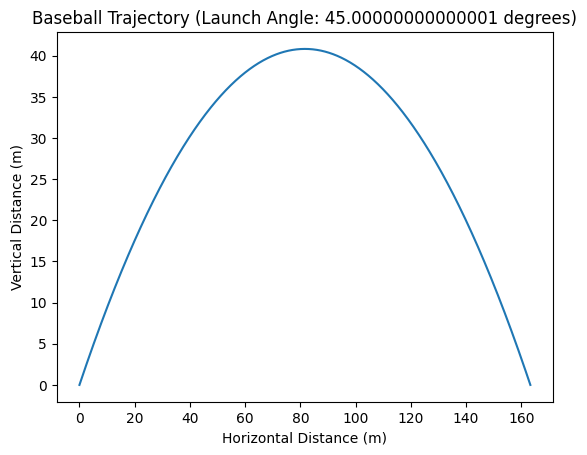

In [3]:
def baseball_trajectory(launch_angle, initial_velocity):
    g = 9.8  # Acceleration due to gravity (m/s^2)
    air_density = 1.225  # Air density at sea level (kg/m^3)
    drag_coefficient = 0.47  # Drag coefficient (for a sphere)
    baseball_mass = 0.145  # Mass of the baseball (kg)

    total_time = (2 * initial_velocity * np.sin(np.radians(launch_angle))) / g
    time_points = np.linspace(0, total_time, 1000)

    def motion_equation(t):
        velocity_x = initial_velocity * np.cos(np.radians(launch_angle))
        velocity_y = initial_velocity * np.sin(np.radians(launch_angle)) - g * t
        velocity = np.sqrt(velocity_x**2 + velocity_y**2)

        drag_force = -0.5 * drag_coefficient * air_density * velocity**2
        drag_acceleration_x = (drag_force / baseball_mass) * (velocity_x / velocity)
        drag_acceleration_y = (drag_force / baseball_mass) * (velocity_y / velocity)

        return velocity_x, velocity_y - drag_acceleration_y * t, drag_acceleration_x, -g - drag_acceleration_y

    positions = np.zeros((len(time_points), 2))
    velocities = np.zeros((len(time_points), 2))

    for i, t in enumerate(time_points):
        positions[i, :] = np.array([initial_velocity * np.cos(np.radians(launch_angle)) * t,
                                    initial_velocity * np.sin(np.radians(launch_angle)) * t - 0.5 * g * t**2])

        velocity_x, velocity_y, _, _ = motion_equation(t)
        velocities[i, :] = np.array([velocity_x, velocity_y])

    return positions, velocities

def horizontal_distance(launch_angle, initial_velocity):
    positions, _ = baseball_trajectory(launch_angle, initial_velocity)
    return -positions[-1, 0]  # Negative because we want to maximize the distance

def optimize_launch_angle(initial_velocity):
    result = minimize_scalar(horizontal_distance, bounds=(0, 90), args=(initial_velocity,), method='bounded')
    return result.x, -result.fun  # Return launch angle and maximum distance

def plot_baseball_trajectory(launch_angle, initial_velocity):
    positions, _ = baseball_trajectory(launch_angle, initial_velocity)
    plt.plot(positions[:, 0], positions[:, 1])
    plt.title(f'Baseball Trajectory (Launch Angle: {launch_angle} degrees)')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.show()

def main():
    initial_velocity = 40.0  # Initial velocity (m/s)

    optimal_launch_angle, max_distance = optimize_launch_angle(initial_velocity)

    print(f"Optimal Launch Angle: {optimal_launch_angle} degrees")
    print(f"Maximum Horizontal Distance: {max_distance} meters")

    # Plot trajectory for optimal launch angle
    plot_baseball_trajectory(optimal_launch_angle, initial_velocity)

if __name__ == '__main__':
    main()